# ENEL 645 - Assignment 3
## Adam Kerr - 10146363

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Section I - Neural Network on Heart Dataset

## Part 1 - Learning with Neural networks

### 1. Please download the “heart.csv’ file. Data preprocessing with pandas: From the tutorial, please modify the code to do the following.

#### a. Read the data from csv file.

In [2]:
df = pd.read_csv('heart.csv') 

#remove samples where chest pain = 4 (NaN in original data)
d = df['ca'] != 4
df = df[d]

#remove samples where thal = 0. (NaN in original data)
d2 = df['thal'] != 0
df = df[d2]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### b. Read selected columns (attributes) and the label as attribute 14.

In [3]:
x = df.loc[:,:'thal']
y = df.loc[:,'target']

#### c. Form a numpy array

In [4]:
x = x.to_numpy()
y = y.to_numpy()

#### d. Split into training, testing sets with the data. Use 20% as the testing ratio. 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
y_train = y_train.ravel()
y_test = y_test.ravel()

#### e. Standardize the continuous attributes. (fit on training and apply on train/test).

In [6]:
from sklearn.preprocessing import StandardScaler as ss
heart_scaler = ss()

x_train_scaled = heart_scaler.fit_transform(x_train)
x_test_scaled = heart_scaler.transform(x_test)

### 2. Implement the Neural Network Classifier:

In [7]:
import tensorflow as tf
from keras import regularizers, optimizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


#### a. Use a two hidden layer neural network with 128 neurons in each layer with a ‘relu’ activation. The input is the 13 standardized attributes as features

In [8]:
train_labels_enc = to_categorical(y_train)
test_labels_enc = to_categorical(y_test)

num_inputs = x_train_scaled.shape[1] # Total number of input variables (per sample)
num_labels = train_labels_enc.shape[1] # Total number of output labels - 3.

heart_model = Sequential() 
heart_model.add(Dense(128, input_shape=(num_inputs,)))
heart_model.add(Activation('relu'))
heart_model.add(Dense(128))  
heart_model.add(Activation('relu'))

#### b. In the output layer, specify a 2 neuron (no heart disease, heart disease) output, with ‘softmax’ activation. 

In [9]:
heart_model.add(Dense(num_labels))
heart_model.add(Activation('softmax'))

#### c. Compile the model, using ‘adam’ optimizer, loss as ‘categorical_crossentropy’, and metrics [‘accuracy’].

In [10]:
heart_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### d. Fit (train) the model using the training data for 150 epoch. (Chosen from the loss plots for convergence)

In [11]:
history = heart_model.fit(x_train_scaled, train_labels_enc, epochs=150)

Epoch 1/150
236/236 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7712
Epoch 2/150
236/236 [==============================] - 0s 237us/step - loss: 0.4197 - accuracy: 0.8305
Epoch 3/150
236/236 [==============================] - 0s 165us/step - loss: 0.3678 - accuracy: 0.8475
Epoch 4/150
236/236 [==============================] - 0s 246us/step - loss: 0.3368 - accuracy: 0.8602
Epoch 5/150
236/236 [==============================] - 0s 148us/step - loss: 0.3139 - accuracy: 0.8771
Epoch 6/150
236/236 [==============================] - 0s 195us/step - loss: 0.2971 - accuracy: 0.8729
Epoch 7/150
236/236 [==============================] - 0s 161us/step - loss: 0.2801 - accuracy: 0.8898
Epoch 8/150
236/236 [==============================] - 0s 301us/step - loss: 0.2642 - accuracy: 0.9110
Epoch 9/150
236/236 [==============================] - 0s 144us/step - loss: 0.2532 - accuracy: 0.9068
Epoch 10/150
236/236 [==============================] - 0s 220us/step - los

#### e. Evaluate the results of the model. 

See below.

### 3. Answer the following questions:
#### a. Print the model.summary(). For the dense_1 layer, verify the number of parameters (Param #) is correct. Hint: consider a dense layer implements 𝑦 = 𝑊𝑥 + 𝑏 and depends on input and output shape.

In [12]:
heart_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 18,562
Trainable params: 18,562
Non-trainable params: 0
__________________________________________________

In [13]:
print("Layer 1: 13 inputs * 128 outputs + 128 biases = %d" % (13*128+128))
print("Layer 2: 128 inputs * 128 outputs + 128 biases = %d" % (128*128+128))
print("Layer 3: 128 inputs * 2 outputs + 2 biases = %d" % (128*2+2))

Layer 1: 13 inputs * 128 outputs + 128 biases = 1792
Layer 2: 128 inputs * 128 outputs + 128 biases = 16512
Layer 3: 128 inputs * 2 outputs + 2 biases = 258


#### b. Plot the training cross_entropy loss, the training accuracy with the number of epoch (full iterations over dataset) in the data. 

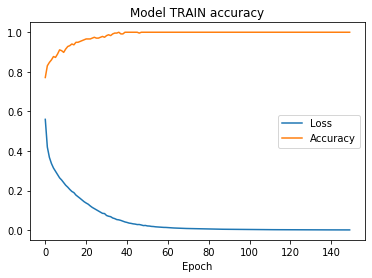

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])  #if validation_split>0
plt.title('Model TRAIN accuracy')
#plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='right')
plt.show()

#### c. What is the final accuracy and loss on the test set with parameters from [2 .Implement the Neural Network Classifier]?

In [15]:
test_loss, test_acc = heart_model.evaluate(x_test_scaled,  test_labels_enc, verbose=2)
print('\nTest loss:', test_loss)  #if loss is much higher than training, maybe overfit or model too small
print('\nTest accuracy: %f %%' % (test_acc * 100))


Test loss: 0.8558428049087524

Test accuracy: 86.666667 %


#### d. Determine the output probabilities and diagnosis of a patient with the following 13 attributes (standardize the data first):
##### i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]

In [16]:
x_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2]).reshape(1,-1)
x_patient_scaled = heart_scaler.transform(x_patient)

y_pred = heart_model.predict_proba(x_patient_scaled)
print(y_pred)

[[2.3452072e-05 9.9997652e-01]]


##### ii. X_patient = [56,1,0,112,233,0,1,123,1,2.8,1,1,3]

In [17]:
x_patient = np.array([56,1,0,112,233,0,1,123,1,2.8,1,1,3]).reshape(1,-1)
x_patient_scaled = heart_scaler.transform(x_patient)

y_pred = heart_model.predict_proba(x_patient_scaled)
print(y_pred)

[[9.9999976e-01 2.6929592e-07]]


#### e. What parameters are modifiable to the analyst in a standard neural network? 

In addition to the input/outputs, the optimizer can be modified, as well as the loss function. Additionally, different metrics can be specified for measuring the performance of the model during training. Weighted matrices can also be provided for scaling the values of loss and the chosen metrics.

# Section II - Support Vector Machine on Heart Dataset
## Part II. Learning with Support Vector Machine
### 1. Data preprocessing: use the same standardized attributes as inputs to the SVM

In [18]:
x_train_scaled = heart_scaler.fit_transform(x_train)
x_test_scaled = heart_scaler.transform(x_test)

### 2. Implement the Support Vector Machine Classifier:
#### a. Use a nonlinear SVM with a radial basis function kernel (gamma='scale',kernel='rbf', probabilities=True)

In [19]:
from sklearn import svm
heart_svm = svm.SVC(gamma='scale', kernel='rbf', probability=True)

#### b. Fit (train) the model using the training data

In [20]:
heart_svm.fit(x_train_scaled, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### c. Evaluate the results of the model. 

See below.

### 3. Answer the following questions:
#### a. What is the accuracy on the training and test set with parameters from [2. Implement the Support Vector Machine Classifier]?

In [21]:
print("Train accuracy: %f %%" % (heart_svm.score(x_train_scaled, y_train) * 100))
print("Test accuracy: %f %%" % (heart_svm.score(x_test_scaled, y_test) * 100))

Train accuracy: 92.372881 %
Test accuracy: 83.333333 %


#### b. Change the SVM to kernel=’linear’, and ‘poly’ and report the training and test accuracy and confusion matrices.

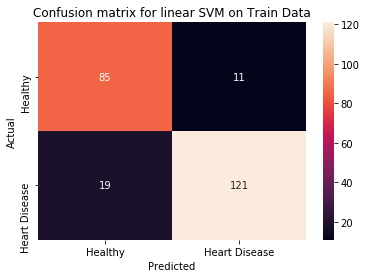

Train accuracy for SVM with 'linear' kernel: 87.288136 %


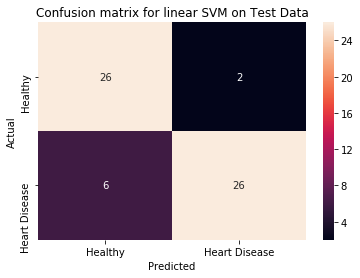

Test accuracy for SVM with 'linear' kernel: 86.666667 %


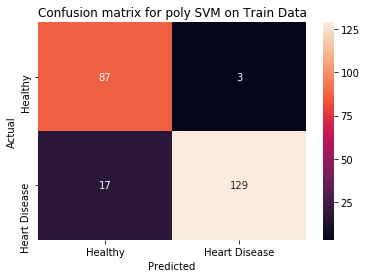

Train accuracy for SVM with 'poly' kernel: 91.525424 %


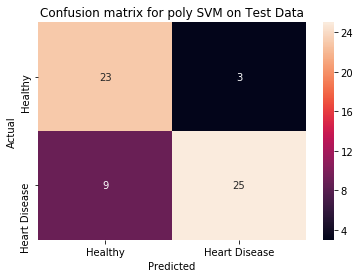

Test accuracy for SVM with 'poly' kernel: 80.000000 %


In [22]:
from sklearn.metrics import confusion_matrix

heart_svm_linear = svm.SVC(gamma='scale', kernel='linear', probability=True)
heart_svm_linear.fit(x_train_scaled, y_train) 

y_pred_train_linear = heart_svm_linear.predict(x_train_scaled)
y_pred_test_linear = heart_svm_linear.predict(x_test_scaled)

fig, ax = plt.subplots()
cm = confusion_matrix(y_pred_train_linear, y_train)
df_cm = pd.DataFrame(cm, ['Healthy', 'Heart Disease'], ['Healthy', 'Heart Disease'])
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for linear SVM on Train Data')
plt.show()

print("Train accuracy for SVM with 'linear' kernel: %f %%" % (heart_svm_linear.score(x_train_scaled, y_train) * 100))

fig, ax = plt.subplots()
cm = confusion_matrix(y_pred_test_linear, y_test)
df_cm = pd.DataFrame(cm, ['Healthy', 'Heart Disease'], ['Healthy', 'Heart Disease'])
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for linear SVM on Test Data')
plt.show()

print("Test accuracy for SVM with 'linear' kernel: %f %%" % (heart_svm_linear.score(x_test_scaled, y_test) * 100))

heart_svm_poly = svm.SVC(gamma='scale', kernel='poly', probability=True)
heart_svm_poly.fit(x_train_scaled, y_train) 

y_pred_train_poly = heart_svm_poly.predict(x_train_scaled)
y_pred_test_poly = heart_svm_poly.predict(x_test_scaled)

fig, ax = plt.subplots()
cm = confusion_matrix(y_pred_train_poly, y_train)
df_cm = pd.DataFrame(cm, ['Healthy', 'Heart Disease'], ['Healthy', 'Heart Disease'])
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for poly SVM on Train Data')
plt.show()

print("Train accuracy for SVM with 'poly' kernel: %f %%" % (heart_svm_poly.score(x_train_scaled, y_train) * 100))

fig, ax = plt.subplots()
cm = confusion_matrix(y_pred_test_poly, y_test)
df_cm = pd.DataFrame(cm, ['Healthy', 'Heart Disease'], ['Healthy', 'Heart Disease'])
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for poly SVM on Test Data')
plt.show()

print("Test accuracy for SVM with 'poly' kernel: %f %%" % (heart_svm_poly.score(x_test_scaled, y_test) * 100))

#### f. Using the ‘rbf’, ‘linear’, and ‘poly’ kernel, Determine the output probabilities and diagnosis of a patient with the following 13 attributes (standardize the data first):
##### i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2] 

In [23]:
x_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2]).reshape(1,-1)
x_patient_scaled = heart_scaler.transform(x_patient)

y_prob_rbf = heart_svm.predict_proba(x_patient_scaled)
y_prob_linear = heart_svm_linear.predict_proba(x_patient_scaled)
y_prob_poly = heart_svm_poly.predict_proba(x_patient_scaled)

print("Probabilty from 'rbf' SVM: ", y_prob_rbf)
print("Probabilty from 'linear' SVM: ", y_prob_linear)
print("Probabilty from 'poly' SVM: ", y_prob_poly)

Probabilty from 'rbf' SVM:  [[0.08787876 0.91212124]]
Probabilty from 'linear' SVM:  [[0.18382166 0.81617834]]
Probabilty from 'poly' SVM:  [[0.22960989 0.77039011]]


##### ii. X_patient = [56,1,0,112,233,0,1,123,1,2.8,1,1,3]

In [24]:
x_patient = np.array([56,1,0,112,233,0,1,123,1,2.8,1,1,3]).reshape(1,-1)
x_patient_scaled = heart_scaler.transform(x_patient)

y_prob_rbf = heart_svm.predict_proba(x_patient_scaled)
y_prob_linear = heart_svm_linear.predict_proba(x_patient_scaled)
y_prob_poly = heart_svm_poly.predict_proba(x_patient_scaled)

print("Probabilty from 'rbf' SVM: ", y_prob_rbf)
print("Probabilty from 'linear' SVM: ", y_prob_linear)
print("Probabilty from 'poly' SVM: ", y_prob_poly)

Probabilty from 'rbf' SVM:  [[0.96863544 0.03136456]]
Probabilty from 'linear' SVM:  [[0.91906018 0.08093982]]
Probabilty from 'poly' SVM:  [[0.92089069 0.07910931]]


# Section III - Neural Network and SVM on Time Series Data
## Part III. Time series classification: Data exploration and Learning with Neural Network
### 1. Data Exploration and Visualization: When starting with an unfamiliar dataset it helps to visualize the training data, explore patterns to help discriminate any labelled classes. Read the 6 attributes for the training data as described above.

In [25]:
from scipy.io import loadmat
train_data = loadmat('DataSensors\\rawSensorData_train.mat')
test_data = loadmat('DataSensors\\rawSensorData_test.mat')

labels = loadmat('DataSensors\\labels.mat')
train_labels = labels['train_labels']
test_labels = labels['test_labels']

acc_x_train = train_data['total_acc_x_train']
acc_y_train = train_data['total_acc_y_train']
acc_z_train = train_data['total_acc_z_train']

gyro_x_train = train_data['body_gyro_x_train']
gyro_y_train = train_data['body_gyro_y_train']
gyro_z_train = train_data['body_gyro_z_train']

acc_x_test = test_data['total_acc_x_test']
acc_y_test = test_data['total_acc_y_test']
acc_z_test = test_data['total_acc_z_test']

gyro_x_test = test_data['body_gyro_x_test']
gyro_y_test = test_data['body_gyro_y_test']
gyro_z_test = test_data['body_gyro_z_test']

#### a. Raw time series: Select and make subplots for one training sample of the accelerometer x (128 readings per sample) from each of the 5 classes.

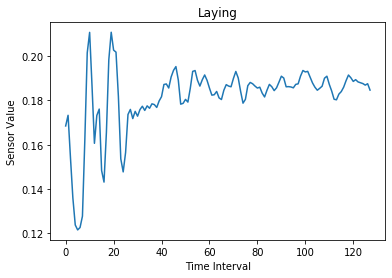

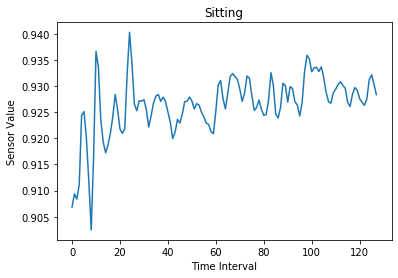

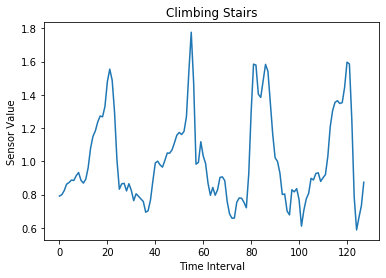

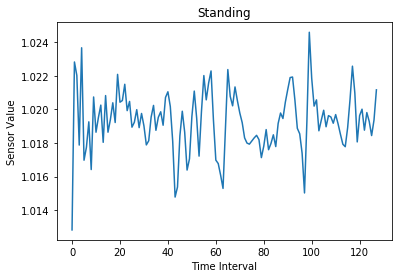

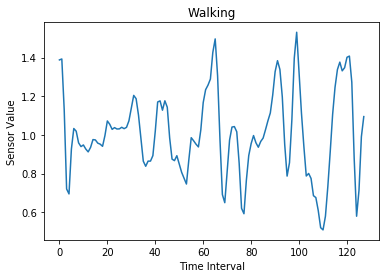

In [26]:
label_names = ['Laying', 'Sitting', 'Climbing Stairs', 'Standing', 'Walking']

for i in range(1,6):
    plt.title(label_names[i - 1])
    plt.ylabel('Sensor Value')
    plt.xlabel('Time Interval')
    plt.plot(acc_x_train[np.where(train_labels==i)[0][0]])
    plt.show()



#### b. Statistical features: Reduce the 128-dimensional attribute into a simple 2-feature input.
##### i. Use numpy.mean and numpy.std to obtain the mean and standard deviation for each sample. 

In [27]:
def reduce_features(data):
    mean = []
    std = []
    for sample in data:
        mean.append(np.mean(sample))
        std.append(np.std(sample))
    return np.array(mean), np.array(std)
    
acc_x_train_mean, acc_x_train_std = reduce_features(acc_x_train)
acc_y_train_mean, acc_y_train_std = reduce_features(acc_y_train)
acc_z_train_mean, acc_z_train_std = reduce_features(acc_z_train)

gyro_x_train_mean, gyro_x_train_std = reduce_features(gyro_x_train)
gyro_y_train_mean, gyro_y_train_std = reduce_features(gyro_y_train)
gyro_z_train_mean, gyro_z_train_std = reduce_features(gyro_z_train)

acc_x_test_mean, acc_x_test_std = reduce_features(acc_x_test)
acc_y_test_mean, acc_y_test_std = reduce_features(acc_y_test)
acc_z_test_mean, acc_z_test_std = reduce_features(acc_z_test)

gyro_x_test_mean, gyro_x_test_std = reduce_features(gyro_x_test)
gyro_y_test_mean, gyro_y_test_std = reduce_features(gyro_y_test)
gyro_z_test_mean, gyro_z_test_std = reduce_features(gyro_z_test)

##### ii. Visualize in 3D, the mean acceleration in (x,y,z) and color-code each sample with the corresponding label. In other words, plot the 7352 points using 3 features (mean_x, mean_y, mean_z). 

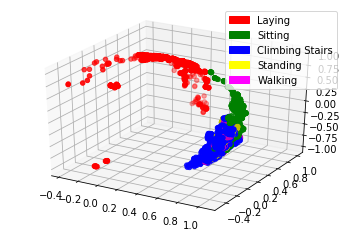

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

colors = {1:'r', 2:'g', 3:'b', 4:'y', 5:'m'}

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

cc = np.array([colors[label[0]] for label in train_labels])

ax.scatter(acc_x_train_mean, acc_y_train_mean, acc_z_train_mean, c=cc)

legend_dict = { 'Laying' : 'red', 'Sitting' : 'green', 'Climbing Stairs' : 'blue', 'Standing' : 'yellow', 'Walking' : 'magenta'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.show()

### 2. Data Preparation: The mean/std features are the inputs to our classifier
#### a. Stack/combine the [mean, std] for all attributes into a single numpy array with 12 features. Suppose “ax” = accelerometer x, “by” = body gyro y...
#### Our feature is: [mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx)…std(bz)]

In [29]:
d_train = {'mean(ax)' : acc_x_train_mean,
           'mean(ay)' : acc_y_train_mean,
           'mean(az)' : acc_z_train_mean, 
           'std(ax)' : acc_x_train_std, 
           'std(ay)' : acc_y_train_std, 
           'std(az)' : acc_z_train_std, 
           'mean(bx)' : gyro_x_train_mean, 
           'mean(by)' : gyro_y_train_mean, 
           'mean(bz)' : gyro_z_train_mean, 
           'std(bx)' : gyro_x_train_std, 
           'std(by)' : gyro_y_train_std, 
           'std(bz)' : gyro_z_train_std }

train_frame = pd.DataFrame(data=d_train)
train_data = train_frame.to_numpy()
train_frame

,mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx),mean(by),mean(bz),std(bx),std(by),std(bz)
0,1.019305,-0.124262,0.099732,0.001791,0.003270,0.003970,0.022250,0.019403,0.009468,0.014434,0.019828,0.005943
1,1.019448,-0.122936,0.096939,0.001932,0.004930,0.004918,0.011926,-0.004314,0.006308,0.016334,0.010356,0.007431
2,1.019927,-0.124997,0.092897,0.002904,0.006460,0.006145,-0.004150,-0.012640,0.004335,0.022256,0.006920,0.008753
3,1.020349,-0.130493,0.087654,0.002574,0.004029,0.004945,-0.016228,-0.007697,-0.000352,0.009165,0.007793,0.008186
4,1.020255,-0.130209,0.084999,0.001949,0.003876,0.003637,-0.006483,-0.000166,-0.003957,0.014544,0.007815,0.008260
...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.993124,-0.224678,-0.068424,0.260127,0.170811,0.187014,-0.007579,-0.008430,0.016854,0.524444,0.829245,0.404561
7348,0.984407,-0.218768,-0.057635,0.247716,0.167062,0.182643,0.150959,-0.009665,-0.023482,0.454077,0.839441,0.393589
7349,0.985348,-0.218529,-0.010961,0.253191,0.153142,0.216067,-0.191333,0.051317,0.049415,0.540996,0.906278,0.354276
7350,0.990478,-0.215775,-0.026930,0.252923,0.151153,0.219500,-0.390396,0.064625,0.040335,0.410036,0.909678,0.345620


#### b. The training and test set is already divided. Repeat on the test set.

In [30]:
d_test = {'mean(ax)' : acc_x_test_mean,
          'mean(ay)' : acc_y_test_mean,
          'mean(az)' : acc_z_test_mean, 
          'std(ax)' : acc_x_test_std, 
          'std(ay)' : acc_y_test_std, 
          'std(az)' : acc_z_test_std, 
          'mean(bx)' : gyro_x_test_mean, 
          'mean(by)' : gyro_y_test_mean, 
          'mean(bz)' : gyro_z_test_mean, 
          'std(bx)' : gyro_x_test_std, 
          'std(by)' : gyro_y_test_std, 
          'std(bz)' : gyro_z_test_std }

test_frame = pd.DataFrame(data=d_test)
test_data = test_frame.to_numpy()
test_frame

,mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx),mean(by),mean(bz),std(bx),std(by),std(bz)
0,0.993803,-0.267531,0.138710,0.019505,0.009835,0.019915,0.152280,-0.007880,0.045718,0.103101,0.142182,0.030697
1,0.993323,-0.268710,0.140849,0.009345,0.006086,0.013244,0.026941,-0.050997,0.041768,0.066256,0.055685,0.017820
2,0.992927,-0.273769,0.134786,0.003166,0.007331,0.008644,-0.021182,-0.041510,0.030026,0.025122,0.018389,0.013929
3,0.991127,-0.283087,0.131889,0.003101,0.008160,0.009135,-0.029875,-0.023333,0.014165,0.029631,0.020964,0.019917
4,0.990448,-0.290141,0.123383,0.003382,0.005975,0.007692,-0.033330,-0.004688,-0.003396,0.023676,0.018816,0.017797
...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.972528,-0.277329,-0.230078,0.231131,0.143490,0.139813,-0.118397,0.045051,0.051575,0.380973,0.362786,0.360653
2943,0.983719,-0.268153,-0.228845,0.225604,0.170533,0.143484,0.092597,0.014079,0.012066,0.466586,0.369425,0.417144
2944,0.980682,-0.232996,-0.230343,0.217645,0.160420,0.133889,-0.099051,0.072537,0.077493,0.503069,0.339755,0.389231
2945,0.958825,-0.225295,-0.232670,0.219793,0.130322,0.142279,-0.317900,0.078418,0.118935,0.289792,0.341198,0.319241


#### c. Standardize the 12 features (fit on training and apply on train/test)

In [31]:
sensor_scaler = ss()

train_data_scaled = sensor_scaler.fit_transform(train_data)
test_data_scaled = sensor_scaler.transform(test_data)

### 3. Implement the Neural Network Classifier:
#### a. Use a two hidden layer neural network with 128 neurons in each layer, followed by ‘relu” activation. The input contains the 12 features (standardized)

In [32]:
train_labels_enc = to_categorical(train_labels)
test_labels_enc = to_categorical(test_labels)

num_inputs = train_data_scaled.shape[1] # Total number of input variables (per sample)
num_labels = train_labels_enc.shape[1] # Total number of output labels - 3.

sensor_model = Sequential() 
sensor_model.add(Dense(128, input_shape=(num_inputs,)))
sensor_model.add(Activation('relu'))
sensor_model.add(Dense(128))  
sensor_model.add(Activation('relu'))

#### b. In the output layer, specify a N=5 neuron output, with ‘softmax’ activation

In [33]:
sensor_model.add(Dense(num_labels))
sensor_model.add(Activation('softmax'))

#### c. Compile the model, using ‘adam’ optimizer, loss as ‘categorical_crossentropy’, and metrics of [‘accuracy’].

In [34]:
sensor_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### d. Fit (train) the model using the training [7352, 12] features and train_label for 30 epoch.

In [35]:
history = sensor_model.fit(train_data_scaled, train_labels_enc, epochs=30)

Epoch 1/30
7352/7352 [==============================] - 1s 199us/step - loss: 0.4348 - accuracy: 0.8286
Epoch 2/30
7352/7352 [==============================] - 1s 141us/step - loss: 0.2445 - accuracy: 0.8996
Epoch 3/30
7352/7352 [==============================] - 1s 134us/step - loss: 0.2189 - accuracy: 0.9112
Epoch 4/30
7352/7352 [==============================] - 1s 119us/step - loss: 0.2078 - accuracy: 0.9165
Epoch 5/30
7352/7352 [==============================] - 1s 115us/step - loss: 0.1967 - accuracy: 0.9185
Epoch 6/30
7352/7352 [==============================] - 1s 119us/step - loss: 0.1847 - accuracy: 0.9223
Epoch 7/30
7352/7352 [==============================] - 1s 120us/step - loss: 0.1771 - accuracy: 0.9245
Epoch 8/30
7352/7352 [==============================] - 1s 139us/step - loss: 0.1746 - accuracy: 0.9268
Epoch 9/30
7352/7352 [==============================] - 2s 221us/step - loss: 0.1668 - accuracy: 0.9305
Epoch 10/30
7352/7352 [==============================] - 1s 192u

#### e. Evaluate the results of the model on the [2549,12] test feature and test_label

In [36]:
test_loss, test_acc = sensor_model.evaluate(test_data_scaled,  test_labels_enc, verbose=2)
print('\nTest loss:', test_loss)  #if loss is much higher than training, maybe overfit or model too small
print('\nTest accuracy: %f %%' % (test_acc * 100))


Test loss: 0.6121256682651997

Test accuracy: 87.071598 %


### 4. Answer the following questions:
#### a. Show the 3D color coded plot of 1.b. What classes are more “separable” or difficult to classify based on this analysis of the accelerometer? 

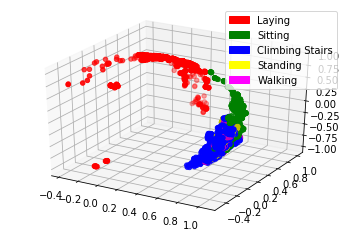

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

cc = np.array([colors[label[0]] for label in train_labels])

ax.scatter(acc_x_train_mean, acc_y_train_mean, acc_z_train_mean, c=cc)

legend_dict = { 'Laying' : 'red', 'Sitting' : 'green', 'Climbing Stairs' : 'blue', 'Standing' : 'yellow', 'Walking' : 'magenta'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.show()

It appears that the Laying and Sitting classes are easier to separate, while Climbing Stairs, Standing, and Walking are more difficult to classify.

#### b. Plot the training cross entropy loss, the training accuracy with the number of epoch (full iterations over dataset) in the data. 

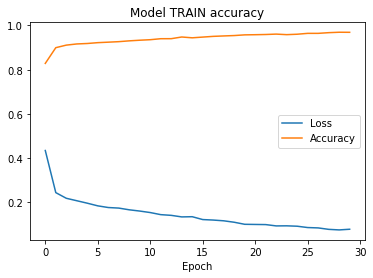

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])  #if validation_split>0
plt.title('Model TRAIN accuracy')
#plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='right')
plt.show()

#### c. Output the confusion matrix and accuracy for both training and test data with neural network.

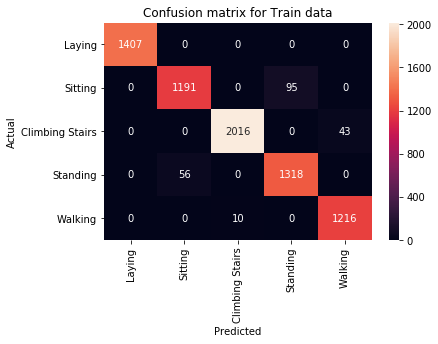

Train accuracy for Network: 97.225245 %


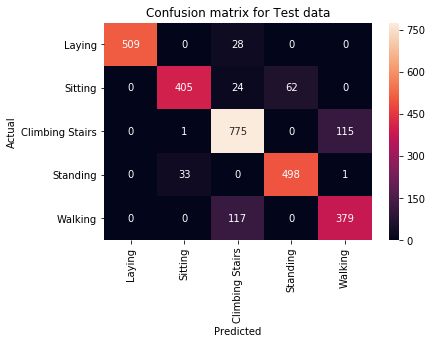

Test accuracy for Network: 87.071598 %


In [39]:
from sklearn.metrics import confusion_matrix

pred_train = sensor_model.predict(train_data_scaled)
pred_test = sensor_model.predict(test_data_scaled)

pred_train = np.array([np.argmax(x) for x in pred_train])
pred_test = np.array([np.argmax(x) for x in pred_test])

incorrect_train = (pred_train != train_labels.reshape(-1,)).sum()
incorrect_test = (pred_test != test_labels.reshape(-1,)).sum()

num_train = len(train_labels)
num_test = len(test_labels)

fig, ax = plt.subplots()
cm = confusion_matrix(train_labels.reshape(-1,), pred_train)
df_cm = pd.DataFrame(cm, label_names, label_names)
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(5.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for Train data')
plt.show()

print("Train accuracy for Network: %f %%" % (((num_train - incorrect_train) / num_train) * 100))

fig, ax = plt.subplots()
cm = confusion_matrix(test_labels.reshape(-1,), pred_test)
df_cm = pd.DataFrame(cm, label_names, label_names)
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(5.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for Test data')
plt.show()

print("Test accuracy for Network: %f %%" % (((num_test - incorrect_test) / num_test) * 100))

### 5. Implement the SVM Classifier: (Simply re-use the code for the tutorial/heart section)
#### a. Use a nonlinear SVM with a radial basis function kernel (gamma='scale', kernel='rbf', probabilities=True)

In [40]:
sensor_svm = svm.SVC(gamma='scale', kernel='rbf', probability=True)

#### b. Fit (train) the model using the training data (12 features and train_label)

In [41]:
sensor_svm.fit(train_data_scaled, train_labels.ravel()) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### c. Evaluate the results of the model and test_label. 

See below.

### 6. Answer the following questions:
#### a. Output the confusion matrix and accuracy for both training and test data with SVM.

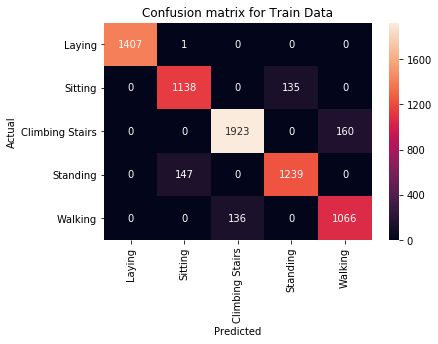

Train accuracy for SVM kernel: 92.124592 %


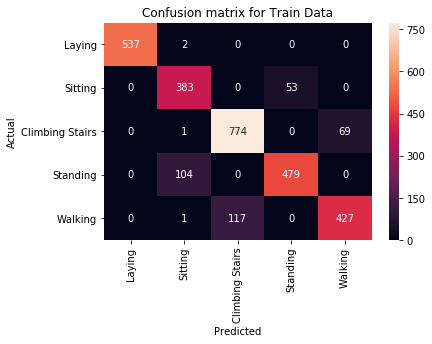

Test accuracy for SVM kernel: 88.225314 %


In [42]:
pred_train = sensor_svm.predict(train_data_scaled)
pred_test = sensor_svm.predict(test_data_scaled)

fig, ax = plt.subplots()
cm = confusion_matrix(pred_train, train_labels)
df_cm = pd.DataFrame(cm, label_names, label_names)
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(5.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for Train Data')
plt.show()

print("Train accuracy for SVM kernel: %f %%" % (sensor_svm.score(train_data_scaled, train_labels) * 100))

fig, ax = plt.subplots()
cm = confusion_matrix(pred_test, test_labels)
df_cm = pd.DataFrame(cm, label_names, label_names)
sn.heatmap(df_cm, annot=True, fmt='g')
ax.set_ylim(5.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for Train Data')
plt.show()

print("Test accuracy for SVM kernel: %f %%" % (sensor_svm.score(test_data_scaled, test_labels) * 100))

#### b. For SVM, which classes of activities are the most difficult and which ones conversely are easy to “classify”? How does this compare with your analysis of data exploration in 1.a. and 1.b? 

Laying is the easiest to classify. The SVM does a decent job classifying the other classes, but it gets somewhat confused between sitting and standing, as well as walking and climbing stairs. This makes sense as those activities are similar. This also corresponds to the expectation, as the laying class was the most discernable. It is hard so see the standing class in the 3D plot but it's possible that it overlaps with the sitting points somewhat.

#### c. In terms of performance and types of activities (6.b), how does the SVM and neural network compare? Are these activities difficult regardless of algorithm?

Both methods perform similarly in terms of their classification abilities. They both get confused with the same classes, indicating that it's likely that classifying these activities is difficult regardless of the method. It also appears that the neural network might be slightly overfitted, as it has a very high train accuracy, but performs slightly worse than the SVM.